In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/drive/MyDrive/exdark_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: exdark/train/2015_04271.jpg  
  inflating: exdark/train/2015_04271.jpg.txt  
  inflating: exdark/train/2015_04272.jpg  
  inflating: exdark/train/2015_04272.jpg.txt  
  inflating: exdark/train/2015_04273.jpg  
  inflating: exdark/train/2015_04273.jpg.txt  
  inflating: exdark/train/2015_04274.jpg  
  inflating: exdark/train/2015_04274.jpg.txt  
 extracting: exdark/train/2015_04275.jpg  
  inflating: exdark/train/2015_04275.jpg.txt  
 extracting: exdark/train/2015_04276.jpg  
  inflating: exdark/train/2015_04276.jpg.txt  
  inflating: exdark/train/2015_04277.jpg  
  inflating: exdark/train/2015_04277.jpg.txt  
  inflating: exdark/train/2015_04278.jpg  
  inflating: exdark/train/2015_04278.jpg.txt  
  inflating: exdark/train/2015_04279.jpg  
  inflating: exdark/train/2015_04279.jpg.txt  
  inflating: exdark/train/2015_04280.jpg  
  inflating: exdark/train/2015_04280.jpg.txt  
  inflating: exdark/train/2015_04281.jpg  
  infl

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    return img_out

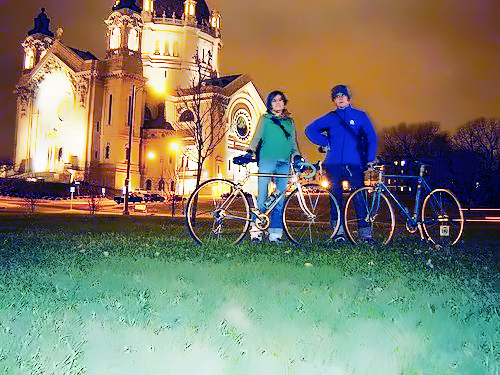

In [ ]:
img = histogram_equalization(cv2.imread('exdark/test/2015_00009.jpg'))
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
cv2_imshow(img)

In [ ]:
import glob
c = 0
for i in ['test','train']:
  paths = glob.glob('exdark/' + i + '/*.*')
  for j in paths:
    if 'txt' not in j.split('.'):
      print(f"Enhanced {j}")
      img = histogram_equalization(cv2.imread(j))
      img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
      cv2.imwrite(j,img)
      c += 1
  print(f"Enhanced {c} images of {i}")
print(f"Enhanced {c} images")
cv2.waitKey(0)
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
Enhanced exdark/train/2015_02667.JPG
Enhanced exdark/train/2015_06503.jpg
Enhanced exdark/train/2015_03644.png
Enhanced exdark/train/2015_01864.png
Enhanced exdark/train/2015_00578.jpg
Enhanced exdark/train/2015_02224.jpg
Enhanced exdark/train/2015_01573.jpg
Enhanced exdark/train/2015_04030.jpg
Enhanced exdark/train/2015_02142.jpg
Enhanced exdark/train/2015_00366.jpg
Enhanced exdark/train/2015_03461.jpg
Enhanced exdark/train/2015_06731.jpg
Enhanced exdark/train/2015_03236.jpg
Enhanced exdark/train/2015_06535.jpg
Enhanced exdark/train/2015_03626.jpg
Enhanced exdark/train/2015_04186.JPG
Enhanced exdark/train/2015_04907.jpg
Enhanced exdark/train/2015_00194.jpg
Enhanced exdark/train/2015_03638.jpg
Enhanced exdark/train/2015_03266.jpg
Enhanced exdark/train/2015_00618.jpg
Enhanced exdark/train/2015_04300.JPEG
Enhanced exdark/train/2015_05369.jpg
Enhanced exdark/train/2015_04339.jpg
Enhanced exdark/train/2015_05390.jpg
Enhanced exdark/train/2

#1391 is a good comparison output

In [ ]:
#1391 is a good comparison output